kmp 2022

Based on **Lauwens & Downey "Think Julia: How to Think Like a Computer Scientist" 
https://benlauwens.github.io/ThinkJulia.jl/latest/book.html**

Resources:

Julia webpage https://julialang.org/ 

Julia documentation https://docs.julialang.org/en/v1/

In [1]:
#===
using Pkg
Pkg.add([
		Pkg.PackageSpec(name="ImageIO"),
		Pkg.PackageSpec(name="ImageShow"),
		Pkg.PackageSpec(name="FileIO"),
		Pkg.PackageSpec(name="PNGFiles")
		])
==#
using ImageIO, ImageShow, FileIO

## Chapter 02 -- Variables, Expressions and Statements

https://benlauwens.github.io/ThinkJulia.jl/latest/book.html#chap02

A programming language provides the ability to manipulate or process information with variables. A **variable** is a name that refers to a value.

### Assignment Statements

An **assignment statement**, `variable name = expression`, creates a new variable and gives it the value of the evaluated expression. For instance:

```Julia
	# variable name = expression
	x = 2
	y = sin(θ)
	z = 1 + i
```

Programmers generally choose names for their variables that are meaningful -- in this way they (partially) **document what the variable is used for**. Variable names can be as long as you like. They can contain almost all **Unicode characters** (see Appendix A or https://en.wikipedia.org/wiki/Unicode), but they **cannot begin with a number**.

Unicode characters can be entered via **tab completion of LaTeX-like abbreviations** (https://en.wikipedia.org/wiki/LaTeX) in the Julia REPL, Jupyter notebooks, and in Julia **`.jl`** files.

In [19]:
n = 17

17

In [2]:
🍌 = 43

43

In [4]:
🍌   

43

In [5]:
typeof(🍌)

Int64

In [21]:
π  # \pi<tab>

π = 3.1415926535897...

In [20]:
π_val = pi

π = 3.1415926535897...

In [6]:
typeof(pi)

Irrational{:π}

A common way to represent variables on paper is to write the name with an arrow pointing to its value. This kind of figure is called a **state diagram** because it shows what state each of the variables is in. State diagram shows the result of the previous example. 

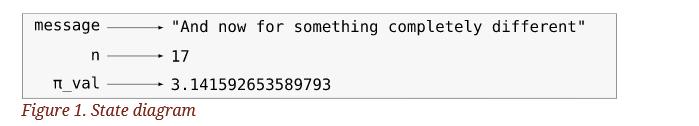

In [7]:
load("state-diagram.png")

The underscore character, _ , can appear in a name. It is often used in names with multiple words, such as `airspeed _ of _ unladen_swallow`. An alternative is so-called **CamelCase**: `AirspeedOfUnladenSwallow`.

If you give a variable an illegal name, you get a syntax error:

```Julia
	julia> 76trombones = "big parade"
		ERROR: syntax: "76" is not a valid function argument name

	julia> more@ = 1000000
		ERROR: syntax: extra token "@" after end of expression
```

In [5]:
struct = "Advanced Theoretical Zym" 
    
    # struct is a reserved word, or **keyword**, and data type in Julia 
    # and can not be used in this way see Julia documentation
    # https://docs.julialang.org/en/v1/base/base/#struct

ErrorException: syntax: unexpected "="

As noted, **struct** is one of Julia’s **keywords** :

```Julia
	abstract type    baremodule   begin      break       catch
	const            continue     do         else        elseif
	end              export       finally    for         function
	global           if           import     importall   in
	let              local        macro      module      mutable struct
	primitive type   quote        return     try         using
	struct           where        while
```

There is typically no need to memorize the list because in most **development environments**, as for example running Julia in the IDE VS Code, an integrated development environment, **keywords are displayed in a different color than variable names**; and if you try to use one as a variable name, you will get instant feedback from Julia.

VS Code and other IDEs are available at **https://julialang.org/**

for a in b 

### Expressions and Statements

An **expression** is a combination of values, variables, and operators. A value all by itself, a **_literal_**, is considered an expression, and so is a variable.

```Julia
	julia> n + 25
```

When you type an expression at the prompt, the REPL **evaluates** it (as in Jupyter code cells), which means that it finds the **value of the expression**.

A **statement** is a unit of code that has an effect, like creating a variable or displaying a value.

```Julia
	julia>	 n = 17

	julia>	 println(n)
```

The first line is an **assignment statement** that gives a value to n. The second line is a **print statement** that displays the value of n. 

When you type a statement, the Julia REPL or Jupyter code cell **executes** it, which means that it does whatever the statement says.

### Script Mode

**Interactive mode** is direct interaction with the REPL. The alternative is to save code in a file called a **script** and then run Julia in **script mode** to execute the script. 

By convention, **Julia scripts** have names that end with **`.jl`**.

Open an **unformatted** text file in for example Notepad, write the script and save with a .jl extension. This can also be done in VS Code with a lot of additional support including high-lighted syntax.

The script can be executed in a terminal via the command **julia `name of the script.jl`**. or via **shell mode** in Julia either using the **fullpath** or first navigating Julia to the directory where the script is localized using **cd("fullpath of the directory")** - you can check the present working directory with **pwd()**:

```Julia
	julia>  ;	# requesting shell mode

	shell> julia <name of the script>.jl
			
	shell>  # backspace to return to the Julia prompt

	julia>	
```

or via Windows PowerShell in Julia with the command:

```Julia
	julia>  ;

	shell> powershell

	PS E:\Julia\aa-ThinkJulia-notebooks\code> julia <name of the script>.jl
			
	PS E:\Julia\aa-ThinkJulia-notebooks\code> exit

	shell>  # backspace

	julia>	
```

### Exercise 2-1a

Write a hello.jl script. For example, save 

```Julia
    println()
    println("Hello World")
    println()
```
in notepad, open a shell, and cd to your present working directory and run `hello.jl`.


### Exercise 2-1b

Type the following statements in the Julia REPL and see what they do:

5
x = 5
x + 1

Now put the same statements in a script and run it. What is the output? Modify the script by transforming each expression into a print statement and then run it again.


### Operator Precedence

When an expression contains more than one operator, the **order of evaluation** depends on the **operator precedence**. For mathematical operators, Julia follows mathematical convention. The acronym **PEMDAS** is a useful way to remember the rules:

**Parentheses** have the highest precedence and can be used to force an expression to evaluate in the order you want. 

- Since expressions in parentheses are evaluated first, 2*(3-1) is 4, and (1+1)^(5-2) is 8. 

- You can also use parentheses to make an expression easier to read, as in (minute * 100) / 60, even if it does not change the result.

**Exponentiation** has the next highest precedence. 

- So 1+2^3 is 9, not 27, and 2*3^2 is 18, not 36.

**Multiplication and Division** have higher precedence than **Addition and Subtraction**. 

- So 2*3-1 is 5, not 4, and 6+4/2 is 8, not 5.

**Operators with the same precedence are evaluated from left to right (except exponentiation).** 

- So in the expression `degrees/2*π` the division happens first and the result is multiplied by π. 


In [9]:
radians = pi/2
radians / (2 * π)   # π = \pi<TAB>

0.25

In [11]:
radians / 2 * π     # evaluates differently from radians / (2 * π)

2.4674011002723395

In [12]:
radians / 2π

0.25

### String Operations

In general, you cannot perform mathematical operations on strings, even if the strings look like numbers, so the following are illegal:

```Julia
	"2" - "1"    		# illegal
	"eggs" / "easy"    
	"third" + "a charm"
```

There are **two exceptions**, * and ^. The * operator performs **string concatenation**, which means it joins the strings by linking them end-to-end. For example:

In [10]:
first_str = "throat"
second_str = "warbler"
first_str * second_str

"throatwarbler"

The **`^`** operator also works on strings; it performs **string repetition**. For example:

In [11]:
"Spam"^3

"SpamSpamSpam"

If one of the values is a string, the other has to be an integer. This use of * and ^ makes sense **by analogy** with multiplication and exponentiation. Just as 4^3 is equivalent to 4 * 4 * 4, we expect "Spam"^3 to be the same as "Spam" * "Spam" * "Spam" = "SpamSpamSpam".

### Comments

It is a good idea to **add notes to programs, or scripts,** to explain what the program is doing. These notes are called **comments**, and they start with the **hash symbol `#`** :

```Julia
	# compute the percentage of the hour that has elapsed
	percentage = (minutes * 100) / 60
```

You can also put comments at the end of a line:

```Julia
	percentage = (minutes * 100) / 60   # percentage of an hour
```

**Everything from the # to the end of the line is ignored by Julia** — it has no effect on the execution of the program. 

Good variable names can reduce the need for comments, but long names can make complex expressions hard to read, so there is a tradeoff.

To **comment out** a section of a script or program, which can be very useful during coding or debugging, surround the portion with:

```Julia
	#== 
	  out-commented code 
	==#
```

### Errors and Debugging

**Syntax error** -- syntax refers to the structure of a program and the rules about that structure. For example, parentheses have to come in matching pairs, so (1 + 2) is legal, but 8) is a syntax error. If there is a syntax error anywhere in a program, Julia displays an error message and quits, and the program will not run.

**Runtime error** -- error that occurs during the running of the code/script/program. The error does not appear until after the program has started running. These errors are also called **exceptions** because they usually indicate that something exceptional has happened.

**Semantic error** -- the third type of error is semantic, which means that the error is related to the meaning of the progam. If there is a semantic error in your program, it will run without generating error messages, but it will not do the right thing. It will do something else. Specifically, it will do what you told it to do. Identifying semantic errors can be tricky because it requires you to work backward by looking at the output of the program and trying to figure out what is going wrong and the reason why the program is not computing as intended.

## Exercises

### Exercise 2-2

Repeating the advice from the previous chapter, whenever you learn a new feature, you should try it out in interactive mode and make errors on purpose to see what goes wrong. We have seen that n = 42 is legal. In the Julia REPL, what about 42 = n? How about x = y = 1? What about x, y = 1, 2 ?

In some languages every statement ends with a **semi-colon `;`** . What happens if you put a semi-colon at the end of a Julia statement? What if you put a period at the end of a statement?

In math notation you can multiply x and y like this: x y. What happens if you try that in Julia? What about 5x? Or 5π?

### Exercise 2-3

Practice using the Julia REPL as a calculator: The volume of a sphere with radius r is 4πr^3/3. What is the volume of a sphere with radius 5?

Suppose the cover price of a book is € 24.95, but bookstores get a 40% discount. Shipping costs € 3 for the first copy and 75 cents for each additional copy. What is the total wholesale cost for 60 copies?

If I leave my house at 6:52 am and run 1 mile at an easy pace (8:15 per mile), then 3 miles at tempo (7:12 per mile) and 1 mile at easy pace again, what time do I get home for breakfast?